In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import pathlib
from matplotlib import pyplot as plt
import PIL.Image as Image

In [2]:
#URl for the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
#downloading the dataset
data_dir = tf.keras.utils.get_file('flower_photos', cache_dir = '.', origin = dataset_url, untar = True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
#file path of the dataset
data_dir

'./datasets/flower_photos'

In [5]:
#changing the file path to a windows directory
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
#getting the number of all the images using glob
data_size = len(list(data_dir.glob('*/*.jpg')))
data_size

3670

In [7]:
#getting all image paths with the word 'roses' in it
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5961803532_9368212949_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('datasets/flower_photos/roses/12323085443_8ac0cdb713_n.jpg')]

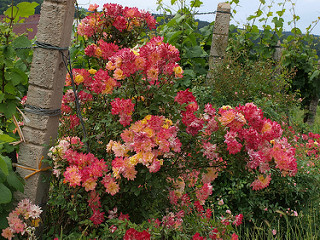

In [8]:
#displaying an image of a rose flower
Image.open(str(roses[1]))

In [9]:
#creating a dictionary to store the image directories with their respective keys
flowers_img_dict = {
     'roses' : list(data_dir.glob('roses/*')),
     'daisy' : list(data_dir.glob('daisy/*')),
     'dandelion' : list(data_dir.glob('dandelion/*')),
     'sunflower' : list(data_dir.glob('sunflower/*')),
     'tulips' : list(data_dir.glob('tulips/*'))
 }

In [10]:
#creating a dictionary to assign the labels to each flower class
flower_labels = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4
}

In [11]:
cv2.imread(str(flowers_img_dict['roses'][1])).shape

(240, 320, 3)

In [12]:
x, y = [], []

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))

        x.append(resized_img)
        y.append(flower_labels[flower_name])

In [13]:
y[2000:2005]

[2, 2, 2, 2, 2]

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.25)

In [16]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [17]:
x_train.shape[1:]

(180, 180, 3)

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=40, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
model.fit(x_train_scaled, y_train, epochs = 20)

Epoch 1/20
70/70 [==============================] - 15s 37ms/step - loss: 1.2136 - accuracy: 0.4268
Epoch 2/20
70/70 [==============================] - 2s 30ms/step - loss: 0.9356 - accuracy: 0.6131
Epoch 3/20
70/70 [==============================] - 2s 31ms/step - loss: 0.7937 - accuracy: 0.6917
Epoch 4/20
70/70 [==============================] - 2s 34ms/step - loss: 0.6827 - accuracy: 0.7428
Epoch 5/20
70/70 [==============================] - 2s 30ms/step - loss: 0.5201 - accuracy: 0.8075
Epoch 6/20
70/70 [==============================] - 2s 34ms/step - loss: 0.3915 - accuracy: 0.8532
Epoch 7/20
70/70 [==============================] - 3s 37ms/step - loss: 0.2643 - accuracy: 0.9102
Epoch 8/20
70/70 [==============================] - 3s 38ms/step - loss: 0.1562 - accuracy: 0.9484
Epoch 9/20
70/70 [==============================] - 3s 46ms/step - loss: 0.1217 - accuracy: 0.9601
Epoch 10/20
70/70 [==============================] - 2s 34ms/step - loss: 0.0678 - accuracy: 0.9811
Epoch 11

In [20]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 1s 17ms/step - loss: 987.8826 - accuracy: 0.5949


[987.882568359375, 0.5948855876922607]

In [21]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip(),
    keras.layers.experimental.preprocessing.RandomContrast(0.8),
    keras.layers.experimental.preprocessing.RandomZoom(0.8),
    keras.layers.experimental.preprocessing.RandomRotation(0.8),
])

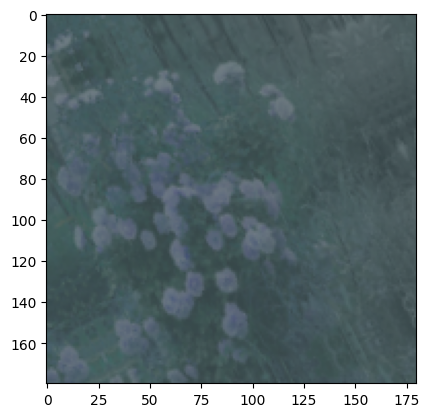

In [22]:
plt.imshow(data_augmentation(x_train[6]).numpy().astype('uint8'))

In [47]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
70/70 [==============================] - 9s 58ms/step - loss: 6.1686 - accuracy: 0.3407
Epoch 2/100
70/70 [==============================] - 4s 51ms/step - loss: 1.3855 - accuracy: 0.4048
Epoch 3/100
70/70 [==============================] - 4s 52ms/step - loss: 1.2924 - accuracy: 0.4399
Epoch 4/100
70/70 [==============================] - 4s 51ms/step - loss: 1.2013 - accuracy: 0.4650
Epoch 5/100
70/70 [==============================] - 4s 51ms/step - loss: 1.2034 - accuracy: 0.4735
Epoch 6/100
70/70 [==============================] - 4s 51ms/step - loss: 1.1540 - accuracy: 0.4883
Epoch 7/100
70/70 [==============================] - 4s 53ms/step - loss: 1.1205 - accuracy: 0.5027
Epoch 8/100
70/70 [==============================] - 4s 51ms/step - loss: 1.1317 - accuracy: 0.4834
Epoch 9/100
70/70 [==============================] - 4s 51ms/step - loss: 1.0971 - accuracy: 0.4996
Epoch 10/100
70/70 [==============================] - 4s 52ms/step - loss: 1.1203 - accuracy: 0.4982

In [25]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 9ms/step - loss: 0.8153 - accuracy: 0.6958


[0.8152761459350586, 0.6958277225494385]

In [26]:
yp = model.predict(x_test)
y_pred = [np.argmax(i) for i in yp]

24/24 [==============================] - 0s 7ms/step


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.64      0.59       161
           1       0.84      0.65      0.73       167
           2       0.73      0.85      0.79       213
           4       0.71      0.62      0.66       202

    accuracy                           0.70       743
   macro avg       0.71      0.69      0.69       743
weighted avg       0.71      0.70      0.70       743



In [49]:
labels = ['roses', 'daisy', 'dandelion', 'sunflower', 'tulips']
x_test.shape[0]

743

In [50]:
def get_prediction(index):
  plt.axis('off')
  plt.imshow(x_test[index])
  print(f'The image below is predicted as a ' + labels[y_pred[index]])

The image below is predicted as a tulips


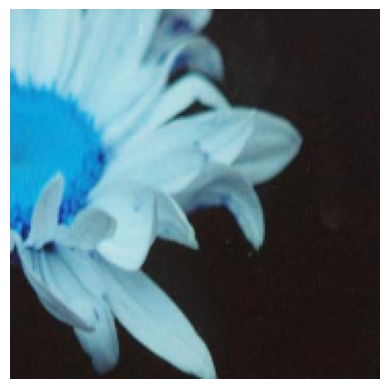

In [51]:
get_prediction(345)

## **